In [111]:
using Plots, Measurements, LsqFit, Statistics, LaTeXStrings

In [183]:
# Define a struct with fields hours, minutes, and seconds
struct Time
    h::Int64 # Hours
    m::Int64 # Minutes
    s::Float64 # Seconds
end

In [184]:
"""
Converts a `Time` object to seconds.

# Arguments
- `t::Time`: A `Time` object with fields `h`, `m`, and `s`.

# Returns
- `Float64`: The total number of seconds represented by the `Time` object.
"""
function time_to_seconds(t::Time)
    return t.h * 3600 + t.m * 60 + t.s
end

time_to_seconds

In [185]:
# Define the measurements as tuples of time and position
measurements_eq = [
    (Time(13, 26, 40), 2.7),
    (Time(13, 27, 7), 1.1),
    (Time(13, 28, 0), 0.0),
    (Time(13, 28, 54), 1.2),
    (Time(13, 29, 36), 3.1),
    (Time(13, 30, 5), 4.7),
    (Time(13, 30, 30), 6.2),
    (Time(13, 31, 3), 8.2),
    (Time(13, 32, 6), 11.1),
    (Time(13, 33, 54), 11.1),
    (Time(13, 34, 56), 9.1),
    (Time(13, 35, 51), 6.6),
    (Time(13, 36, 58), 4.0),
    (Time(13, 39, 44), 3.8),
    (Time(13, 40, 49), 5.7),
    (Time(13, 47, 45), 5.4)
]

# Create vectors t and x from the measurements
t_eq = [time_to_seconds(m[1]) for m in measurements_eq]
x_eq = [m[2] for m in measurements_eq];

In [186]:
t0 = time_to_seconds(Time(13, 48, 0)) ± 0.5

49680.0 ± 0.5

In [187]:
t_eq = [m ± 0.5 for m in t_eq]
x_eq = [m ± 0.05 for m in x_eq];

In [188]:
t_eq .-= t0

16-element Vector{Measurement{Float64}}:
 -1280.0 ± 0.71
 -1253.0 ± 0.71
 -1200.0 ± 0.71
 -1146.0 ± 0.71
 -1104.0 ± 0.71
 -1075.0 ± 0.71
 -1050.0 ± 0.71
 -1017.0 ± 0.71
  -954.0 ± 0.71
  -846.0 ± 0.71
  -784.0 ± 0.71
  -729.0 ± 0.71
  -662.0 ± 0.71
  -496.0 ± 0.71
  -431.0 ± 0.71
   -15.0 ± 0.71

In [189]:
# Define the measurements as an array of tuples
measurements = [
    (Time(13, 48, 48), 7.3),
    (Time(13, 49, 43), 14.4),
    (Time(13, 50, 42), 25.3),
    (Time(13, 51, 23), 33.0),
    (Time(13, 52, 17), 41.2),
    (Time(13, 54, 12), 44.3),
    (Time(13, 55, 4), 39.4),
    (Time(13, 56, 1), 31.6),
    (Time(13, 56, 28), 27.8),
    (Time(13, 57, 17), 21.9),
    (Time(13, 58, 30), 17.4),
    (Time(13, 59, 52), 20.1),
    (Time(14, 0, 36), 24.0),
    (Time(14, 1, 21), 28.6),
    (Time(14, 2, 48), 36.1),
    (Time(14, 4, 54), 37.1),
    (Time(14, 6, 40), 30.0),
    (Time(14, 8, 45), 23.6),
    (Time(14, 11, 21), 27.5),
    (Time(14, 13, 50), 33.9)
]

# Create vectors t and x from the measurements
t1 = [(time_to_seconds(m[1]) ± 0.5) - t0 for m in measurements]
x1 = [(m[2] ± 0.05) for m in measurements];

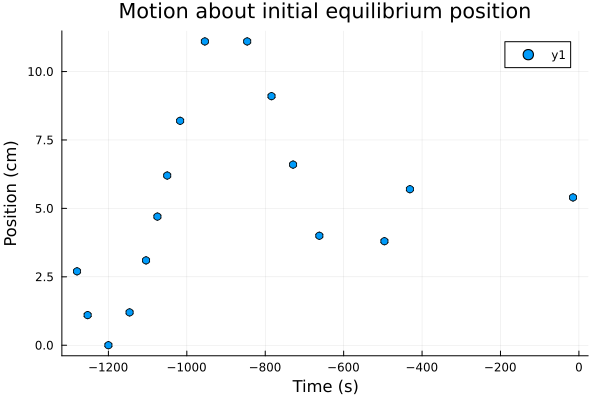

In [190]:
plot(scatter(t_eq, x_eq))
title!("Motion about initial equilibrium position")
xlabel!("Time (s)")
ylabel!("Position (cm)")

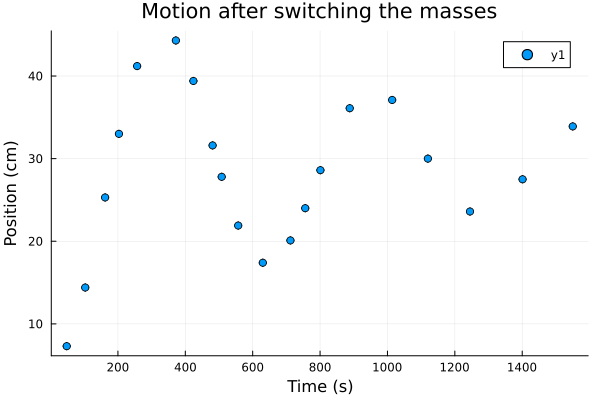

In [191]:
plot(scatter(t1, x1))
title!("Motion after switching the masses")
xlabel!("Time (s)")
ylabel!("Position (cm)")

In [192]:
@. model(x, p) = p[1] * exp( -p[2] * (x + abs(p[3])) ) * sin( p[4] * x + p[5] ) + p[6]

fit_eq = curve_fit(model, [m.val for m in t_eq], [m.val for m in x_eq], [5.5, 0.001, 1280, 0.012, 2.0, 5.0])
fit1 = curve_fit(model, [m.val for m in t1], [m.val for m in x1], [10.0, 0.001, -50, 0.012, -0.5, 28.0])

bestfit_eq(x) = model(x, coef(fit_eq))
bestfit1(x) = model(x, coef(fit1))

bestfit1 (generic function with 1 method)

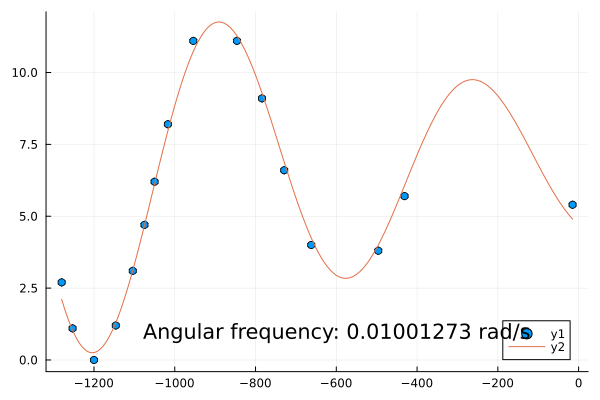

In [193]:
plt = plot(scatter(t_eq, x_eq))
plt = plot!(
    LinRange(minimum([m.val for m in t_eq]), maximum([m.val for m in t_eq]), 200),
    bestfit_eq.(LinRange(minimum([m.val for m in t_eq]), maximum([m.val for m in t_eq]), 200))
)

plt = annotate!(-600, 1.0, "Angular frequency: $(round(coef(fit_eq)[4], digits=8)) rad/s")

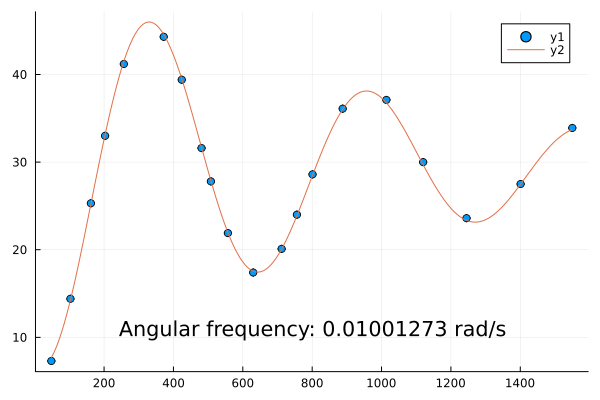

In [194]:
plt = plot(scatter(t1, x1))
plt = plot!(
    LinRange(minimum([m.val for m in t1]), maximum([m.val for m in t1]), 200),
    bestfit1.(LinRange(minimum([m.val for m in t1]), maximum([m.val for m in t1]), 200))
)

plt = annotate!(800, 11.0, "Angular frequency: $(round(coef(fit_eq)[4], digits=8)) rad/s")

In [195]:
#Idea for how to analyze this: Fit the motion of the system before changing the position of the masses, then
#pass the point at the moment of the mass switch as the first value in the second fit.

In [196]:
measurements = [1.0, 2.1, 3.4, 4.6, 6.4, 8.2, 12.3, 14.7, 16.6, 18.8, 20.9, 23.1, 25.3, 29.0, 31.1, 33.8, 35.0, 35.7, 34.8, 33.9, 31.7, 28.4, 25.8, 22.4, 20.1, 17.6, 15.6, 13.6, 12.2, 11.1, 15.4, 17.9, 21.7, 23.9, 26.3, 27.7]

measurement_dict = Dict(i => measurements[i] for i in 1:36);

In [197]:
x2 = Float64[]
t2 = Float64[]

for line in [
    "1. 3:26:05",
    "2. 3:26:21",
    "3. 3:26:35",
    "4. 3:26:47",
    "5. 3:27:01",
    "6. 3:27:13",
    "7. 3:27:39",
    "8. 3:27:53",
    "9. 3:28:04",
    "10. 3:28:17",
    "11. 3:28:29",
    "12. 3:28:43",
    "13. 3:28:57",
    "14. 3:29:22",
    "15. 3:29:39",
    "16. 3:30:07",
    "17. 3:30:28",
    "18. 3:31:05",
    "19. 3:31:36",
    "20. 3:31:52",
    "21. 3:32:17",
    "22. 3:32:48",
    "23. 3:33:10",
    "24. 3:33:37",
    "25. 3:33:56",
    "26. 3:34:18",
    "27. 3:34:38",
    "28. 3:35:01",
    "29. 3:35:25",
    "30. 3:36:03",
    "31. 3:37:46",
    "32. 3:38:18",
    "33. 3:38:59",
    "34. 3:39:25",
    "35. 3:39:59",
    "36. 3:40:26",
    "22. 3:40:46",
    "14. 3:41:35",
    "35. 3:42:48",
    "23. 3:42:59",
    "34. 3:43:28",
    "12. 3:43:44",
    "24. 3:43:54",
    "11. 3:44:17",
    "25. 3:44:30",
    "10. 3:44:53",
    "32. 3:45:09",
    "9. 3:45:48"
]
    index, time_str = split(line, ". ")
    time = Time(parse(Int, split(time_str, ":")[1]), parse(Int, split(time_str, ":")[2]), parse(Float64, split(time_str, ":")[3]))
    push!(x2, measurement_dict[parse(Int, index)])
    push!(t2, time_to_seconds(time))
end

x2 = [0.0; x2]
t2 = [time_to_seconds(Time(3, 25, 37)); t2]
t2 .-= time_to_seconds(Time(3, 25, 37));

In [198]:
x2 = [(m ± 0.05) for m in x2]
t2 = [(m ± 0.5) for m in t2];

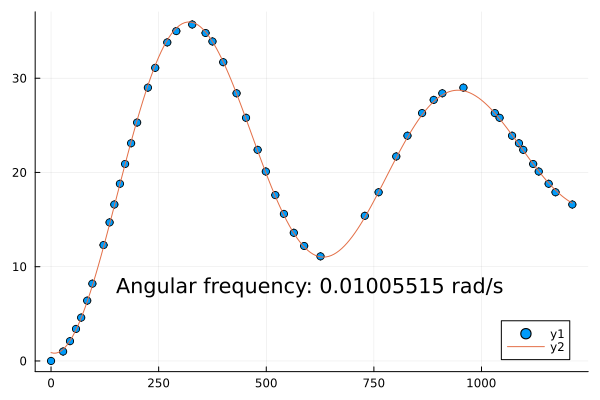

In [199]:
plt = plot(scatter(t2, x2))

fit2 = curve_fit(model, [m.val for m in t2], [m.val for m in x2], [10.0, 0.001, -50, 0.012, -0.5, 28.0])
bestfit2(x) = model(x, coef(fit2))

plt = plot!(LinRange(minimum([m.val for m in t2]), maximum([m.val for m in t2]), 200), bestfit2.(LinRange(minimum([m.val for m in t2]), maximum([m.val for m in t2]), 200)))
plt = annotate!(600, 8.0, "Angular frequency: $(round(coef(fit2)[4], digits=8)) rad/s")

In [200]:
println("Average angular frequency: $(round((coef(fit_eq)[4] + coef(fit2)[4]) / 2, digits=8)) rad/s")

Average angular frequency: 0.01003394 rad/s


In [201]:
println("Average period: $(round(2 * pi / ((coef(fit_eq)[4] + coef(fit2)[4]) / 2), digits=8)) s, = $(round(2 * pi / ((coef(fit_eq)[4] + coef(fit2)[4]) / 2) / 60, digits=8)) min")

Average period: 626.1930946 s, = 10.43655158 min


In [202]:
measurement_data3 = [
    0.7,
    1.6,
    2.7,
    3.9,
    5.3,
    7.1,
    8.9,
    11.3,
    13.4,
    15.6,
    17.6,
    19.3,
    21.4,
    23.8,
    26.9,
    27.9,
    28.3,
    27.4,
    9.8,
    8.0,
    23.1
]

21-element Vector{Float64}:
  0.7
  1.6
  2.7
  3.9
  5.3
  7.1
  8.9
 11.3
 13.4
 15.6
  ⋮
 21.4
 23.8
 26.9
 27.9
 28.3
 27.4
  9.8
  8.0
 23.1

In [203]:
x3 = Measurement[]
t3 = Measurement[]

for line in [
    "1. 2:28:01",
    "2. 2:28:17",
    "3. 2:28:32",
    "4. 2:28:43",
    "5. 2:28:56",
    "6. 2:29:12",
    "7. 2:29:25",
    "8. 2:29:43",
    "9. 2:29:58",
    "10. 2:30:13",
    "11. 2:30:28",
    "12. 2:30:41",
    "13. 2:30:58",
    "14. 2:31:20",
    "15. 2:32:03",
    "16. 2:32:24",
    "17. 2:32:52",
    "18. 2:33:25",
    "14. 2:34:23",
    "13. 2:34:47",
    "12. 2:35:08",
    "11. 2:35:25",
    "10. 2:35:46",
    "9. 2:36:09",
    "8. 2:36:34",
    "19. 2:36:58",
    "7. 2:37:16",
    "20. 2:38:11",
    "7. 2:38:48",
    "19. 2:39:08",
    "8. 2:39:33",
    "9. 2:40:03",
    "10. 2:40:31",
    "11. 2:40:57",
    "12. 2:41:20",
    "13. 2:41:55",
    "21. 2:43:52",
    "13. 2:44:40"
]
    index, time_str = split(line, ". ")
    push!(t3, time_to_seconds(Time(parse(Int, split(time_str, ":")[1]), parse(Int, split(time_str, ":")[2]), parse(Float64, split(time_str, ":")[3]))) ± 0.5)
    push!(x3, measurement_data3[parse(Int64, index)] ± 0.05)
end

In [204]:
pushfirst!(x3, 0.0 ± 0.05)
t3 = [ e - time_to_seconds(Time(2, 27, 35.0))  for e in t3]
pushfirst!(t3, 0.0 ± 0.5)

39-element Vector{Measurement{Float64}}:
    0.0 ± 0.5
   26.0 ± 0.5
   42.0 ± 0.5
   57.0 ± 0.5
   68.0 ± 0.5
   81.0 ± 0.5
   97.0 ± 0.5
  110.0 ± 0.5
  128.0 ± 0.5
  143.0 ± 0.5
        ⋮
  693.0 ± 0.5
  718.0 ± 0.5
  748.0 ± 0.5
  776.0 ± 0.5
  802.0 ± 0.5
  825.0 ± 0.5
  860.0 ± 0.5
  977.0 ± 0.5
 1025.0 ± 0.5

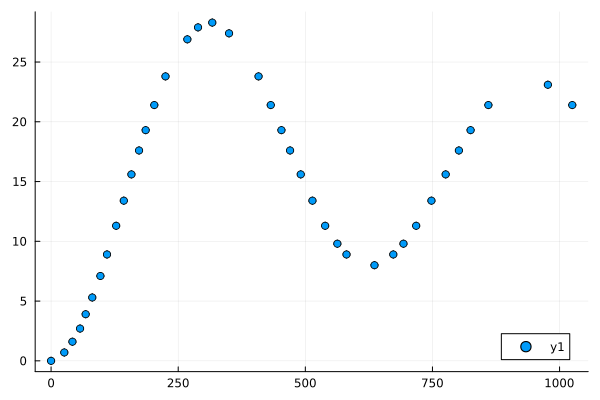

In [205]:
plot(scatter(t3, x3))

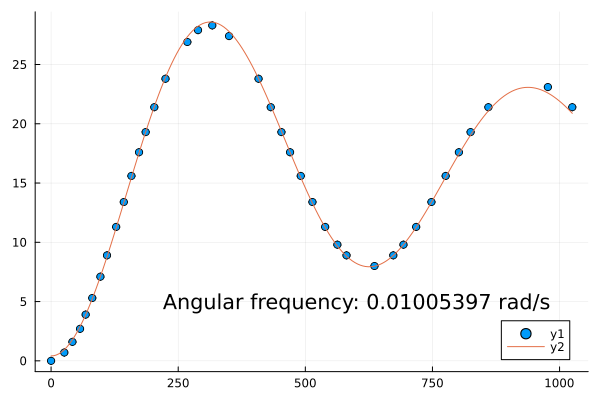

In [206]:
plt = plot(scatter(t3, x3))

fit3 = curve_fit(model, [m.val for m in t3], [m.val for m in x3], [10.0, 0.001, -50, 0.012, -0.5, 28.0])
bestfit3(x) = model(x, coef(fit3))

plt = plot!(LinRange(minimum([m.val for m in t3]), maximum([m.val for m in t3]), 200), bestfit3.(LinRange(minimum([m.val for m in t3]), maximum([m.val for m in t3]), 200)))
plt = annotate!(600, 5.0, "Angular frequency: $(round(coef(fit3)[4], digits=8)) rad/s")

In [207]:
# 2σ uncertainties

ω1 = coef(fit1)[4] ± 2*stderror(fit1)[4]

ω2 = coef(fit2)[4] ± 2*stderror(fit2)[4]

ω3 = coef(fit3)[4] ± 2*stderror(fit3)[4]

0.010054 ± 4.1e-5

In [208]:
ω_ave = (ω1 + ω2 + ω3) / 3
println("Average frequency: $(round(ω_ave, digits=8)) rad/s")

Average frequency: 0.010044 ± 2.0e-5 rad/s


In [209]:
println("Average frequency relative uncertainty: $(round(ω_ave.err/ω_ave.val, digits=4)) = $(round(ω_ave.err/ω_ave.val * 100, digits=4))%")

Average frequency relative uncertainty: 0.002 = 0.2%


In [210]:
println("Amplitudes: $(round(coef(fit_eq)[1], digits=8)) cm, $(round(coef(fit2)[1], digits=8)) cm, $(round(coef(fit3)[1], digits=8)) cm")

Amplitudes: 6.59129736 cm, 20.86056446 cm, 16.58235781 cm


Predicted amplitude at t=0: 5.2763786 cm


In [219]:
A1 = coef(fit1)[1] * exp( -coef(fit1)[2] * (abs(coef(fit1)[3])) )
A2 = coef(fit2)[1] * exp( -coef(fit2)[2] * (abs(coef(fit2)[3])) )
A3 = coef(fit3)[1] * exp( -coef(fit3)[2] * (abs(coef(fit3)[3])) );

In [220]:
println("Amplitudes: $(round(A1, digits=8)) cm, $(round(A2, digits=8)) cm, $(round(A3, digits=8)) cm")

Amplitudes: 23.38738989 cm, 20.85933056 cm, 16.34610473 cm


In [224]:
println("Average amplitude with 2σ uncertainty: $(round((A1 + A2 + A3) / 3, digits=8)) ± $(round(2*std([A1, A2, A3]), digits=8)) cm")

Average amplitude with 2σ uncertainty: 20.19760839 ± 7.1339558 cm
